In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import sympy as sympy
import numpy as np
from sympy import *
init_printing()


In [3]:
def sub_matrix(subs, symbol, value):
    for i, v in enumerate(symbol.values()):
        subs[v] = value[i]
    return subs

def perp(vec2):
    return Matrix([-vec2[1],vec2[0]])

def world_vel(V, w, r_perp):
    return V + w * r_perp

def mass(w,h): #perimeter
    return S(2) * S(w) + S(2) * S(h)

def inertia(w,h):
    m_i = S(w)/S(2) + S(h)/S(2)
    r_i_2 = (S(w)/S(2))**2 + (S(h)/S(2)) **2
    return 4 * m_i * r_i_2

In [4]:
inv_m_A, inv_m_B, inv_I_A, inv_I_B = symbols("m_A^{-1} m_B^{-1} I_A^{-1} I_B^{-1}")
K, C, v_rel_prev, j = symbols("K C v_{rel}^{-} j")

In [5]:
w_A_prev, w_B_prev = symbols("\omega_A^{-1} \omega_B^{-1}")
V_A_prev = Matrix(symbols("V_A^{-1}[0:2]"))
V_B_prev = Matrix(symbols("V_B^{-1}[0:2]"))

In [6]:
# normal direction
n = Matrix(symbols("n[0:2]"))
r_Aperp = Matrix(symbols("r_A^{\perp}[0:2]"))
r_Bperp = Matrix(symbols("r_B^{\perp}[0:2]"))

In [7]:
K_ = inv_m_A + inv_m_B + inv_I_A * (n.T.dot(r_Aperp))**2 + inv_I_B * (n.T.dot(r_Bperp))**2
K_

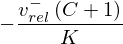

In [8]:
j_ = -S(1)/K * (S(1)+C) * v_rel_prev 
j_

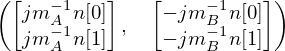

In [9]:
V_A_delta = inv_m_A * j * n
V_B_delta = - inv_m_B * j * n
V_A_delta, V_B_delta

In [10]:
w_A_delta = inv_I_A * j * (n.dot(r_Aperp))
w_B_delta = - inv_I_B * j * (n.dot(r_Bperp))
w_A_delta, w_B_delta

In [11]:
v_A_prev = world_vel(V_A_prev, w_A_prev, r_Aperp)
v_B_prev = world_vel(V_B_prev, w_B_prev, r_Bperp)

In [12]:
subs = dict()

In [20]:
subs[C] = 1
def two_rectangles(subs, wA,hA,wB,hB):
    subs[inv_m_A] = S(1)/mass(wA,hA)
    subs[inv_m_B] = S(1)/mass(wB,hB)
    subs[inv_I_A] = S(1)/inertia(wA,hA)
    subs[inv_I_B] = S(1)/inertia(wB,hB)
    subs[w_A_prev] = 0
    subs[w_B_prev] = 0
    subs = sub_matrix(subs, r_Aperp, perp([S(wA)/S(2), -S(hA)/S(2)]))
    subs = sub_matrix(subs, r_Bperp, perp([-S(wB)/S(2), -S(hA)/S(2)])) # yes hA!
    subs = sub_matrix(subs, n, [-1,0])
    subs = sub_matrix(subs, V_A_prev, [1,0])
    subs = sub_matrix(subs, V_B_prev, [0,0])
    return subs
subs = two_rectangles(subs,4,2,2,4)

In [21]:
subs[v_rel_prev] = ((v_A_prev - v_B_prev).dot(n)).subs(subs)

In [22]:
subs[K] = K_.subs(subs)
subs[j] = j_.subs(subs)

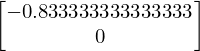

In [31]:
V_A_delta.subs(subs).evalf()

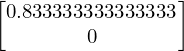

In [32]:
V_B_delta.subs(subs).evalf()

In [37]:
w_A_delta

In [28]:
w_B_delta.subs(subs)

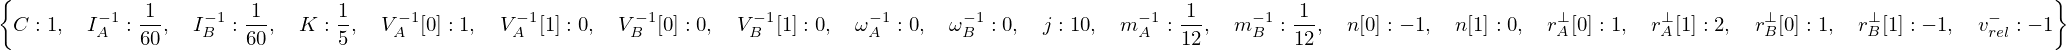

In [29]:
subs

In [40]:
n.dot(r_Aperp).subs(subs)